<a href="https://colab.research.google.com/github/VitikaJain25/HealthCareNLPCourse/blob/main/ANN_Regression_Medical_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/VitikaJain25/MLDataSets/main/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Manipulation

In [3]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Data Preprocessing - Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Training the Label Encoder with Transform
le.fit(insurance_data['sex'].drop_duplicates())

LabelEncoder()

In [6]:
insurance_data['sex'] = le.transform(insurance_data['sex'])

In [7]:
insurance_data['smoker'] = le.fit_transform(insurance_data['smoker'])

In [8]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [9]:
insurance_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
# one way is one-hot encoding
#pd.get_dummies(insurance_data['region'])

# Other way is Label encoding
insurance_data['region'] = le.fit_transform(insurance_data['region'])

In [11]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# EDA

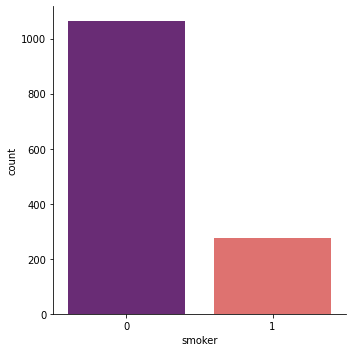

In [12]:
sns.catplot(x = 'smoker', kind = 'count', data = insurance_data, palette = 'magma')
# Majority are Non - smoker
# All objective data type values are gone.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


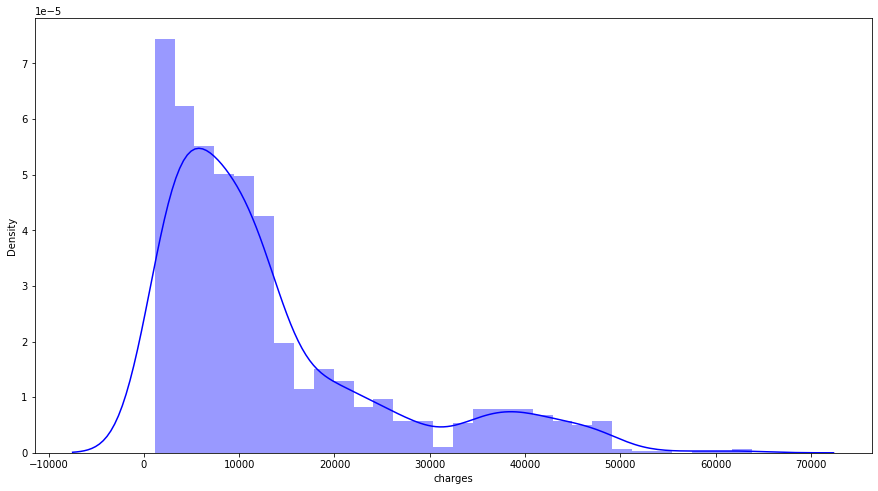

In [13]:
plt.figure(figsize = (15,8))
sns.distplot(insurance_data['charges'], color = 'b')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


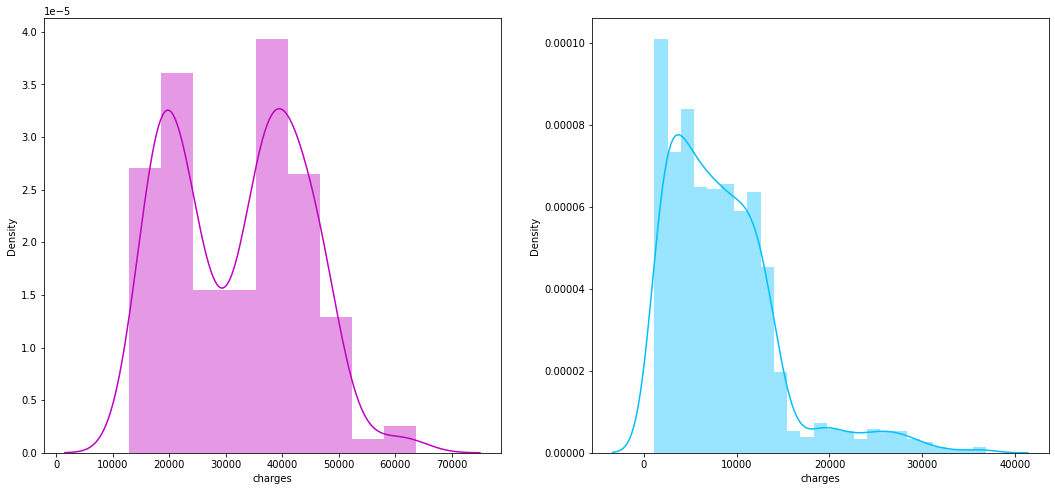

In [14]:
fig = plt.figure(figsize = (18,8))

# 1 row - 2 different images will be plotted.
ax = fig.add_subplot(1, 2, 1)
sns.distplot(insurance_data[(insurance_data['smoker'] == 1)]['charges'], color = 'm', ax = ax)

ax = fig.add_subplot(1, 2, 2)
sns.distplot(insurance_data[(insurance_data['smoker'] == 0)]['charges'], color = 'deepskyblue', ax = ax)
plt.show()